In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

## TODOs
- [ ] Replace left and right with ptotic and normal 
- [ ] Adjust the similarity equation such that ptotic/normal * 100 
- $Similarity = \dfrac{Ptotic}{Normal} * 100$
- [ ] How file is read ? (My convention is right eye contour , left eye contour , right eye pupil , left eye pupil)
- [ ] GUI

In [34]:
def read_coordinates(filename,split_idx):
    coordinates = []
    with open(filename,'r') as coord_file:
        while True:
            p = coord_file.readline().strip('\n')
            if p == '':
                break
            try:
                x,y = p.split('\t')
                coordinates.append((float(x),float(y)))
            except ValueError:
                split_idx = int(p)
    left_pupil = coordinates.pop() # last coord
    right_pupil = coordinates.pop() # before last coord 
    upper_right_contour = coordinates[:split_idx]
    upper_left_contour = coordinates[split_idx:]
    return upper_right_contour,upper_left_contour, right_pupil,left_pupil
            

def choose_best_fit_degree(contour):
    x = [c[0]/100 for c in contour]
    y = [c[1]/100 for c in contour]
    degree = 3
    p = np.polyfit(x,y,degree)
    return x , np.poly1d(p)

def compute_similarity(right_eye_feature,left_eye_feature,ptotic):
    if ptotic == 'r':
        return round(100 * right_eye_feature / left_eye_feature,2)
    else:
        return round(100 * left_eye_feature / right_eye_feature,2)

def plot_contour(right_contour,left_contour,right_pupil,left_pupil,ptotic):
    if not plt.gca().yaxis_inverted():
        plt.gca().invert_yaxis()
    plt.scatter(right_pupil[0]/100,right_pupil[1]/100,c='r')
    plt.scatter(left_pupil[0]/100,left_pupil[1]/100,c='b')

    #################### CHOOSING THE FIT ##########################
    x_right,fx = choose_best_fit_degree(right_contour)
    print(f"Equation of the right eye : \n {fx}")
    x_left,gx = choose_best_fit_degree(left_contour)
    print(f"Equation of the left eye: \n {np.poly1d(gx)}")

    #################### PLOTTING THE FIT ##########################
    x_right_new = np.linspace(min(x_right),max(x_right),100)
    y_right_new = fx(x_right_new)
    plt.plot(x_right_new,y_right_new,c='r')

    x_left_new = np.linspace(min(x_left),max(x_left),100)
    y_left_new = gx(x_left_new)
    plt.plot(x_left_new,y_left_new,c='b')
    plt.show()
    ######################### MRD1 , PHUL , Similarity ############################
    ########################### MRD1 ##################################
    mrd1_right = abs(round((fx(right_pupil[0]/100) - right_pupil[1]/100),2))
    print(f"MRD1 right eye : {mrd1_right} cm" )

    mrd1_left = abs(round((gx(left_pupil[0]/100) - left_pupil[1]/100),2))
    print(f"MRD1 left eye : {mrd1_left} cm" )

    ########################### PHUL ##################################
    mrd1phul_right = abs(x_right_new[np.argmin(fx(x_right_new))] - right_pupil[0]/100)
    print(f"PHUL - MRD1 right_eye: {round(mrd1phul_right,2)} cm")

    mrd1phul_left = abs(x_left_new[np.argmin(gx(x_left_new))] - left_pupil[0]/100)

    print(f"PHUL - MRD1 left_eye: {round(mrd1phul_left,4)} cm")

    ########################### SIMILARITY ##################################
    print(f"Similarity between MRD1 in both eyes :{compute_similarity(mrd1_right,mrd1_left,ptotic)} %")
    print(f"Similarity between PHUL - MRD1 in both eyes :{compute_similarity(mrd1phul_right,mrd1phul_left,ptotic)} %")
    


Equation of the right eye : 
           3          2
-0.03346 x + 0.7053 x - 3.731 x + 10.47
Equation of the left eye: 
           3         2
-0.06568 x + 2.205 x - 23.71 x + 87.03


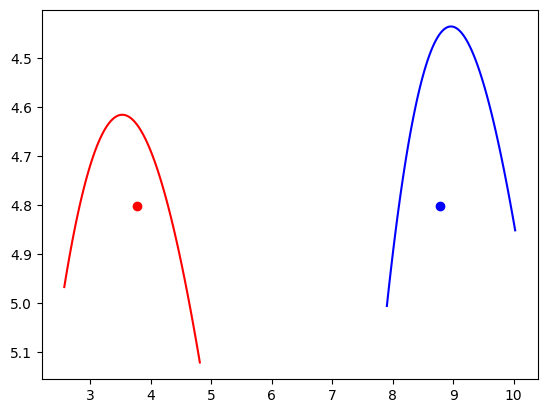

MRD1 right eye : 0.17 cm
MRD1 left eye : 0.35 cm
PHUL - MRD1 right_eye: 0.26 cm
PHUL - MRD1 left_eye: 0.176 cm
Similarity between MRD1 in both eyes :48.57 %
Similarity between PHUL - MRD1 in both eyes :146.17 %


In [35]:
upper_right_contour,upper_left_contour,right_pupil,left_pupil = read_coordinates('rotated.txt',10)
plot_contour(upper_right_contour,upper_left_contour,right_pupil,left_pupil,'r')

Equation of the right eye : 
          3          2
0.05715 x + 0.3518 x - 1.361 x + 3.041
Equation of the left eye: 
           3        2
-0.05407 x + 1.49 x - 11.55 x + 29.43


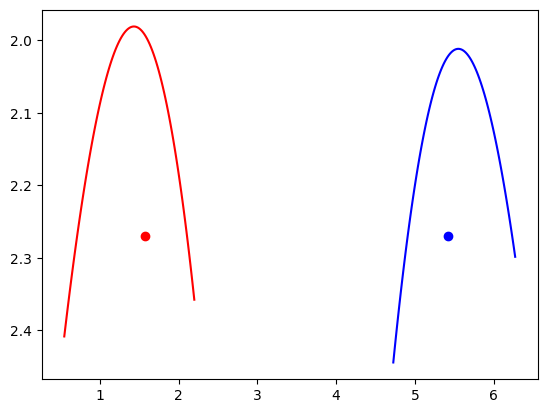

MRD1 right eye : 0.28 cm
MRD1 left eye : 0.25 cm
PHUL - MRD1 right_eye: 0.14 cm
PHUL - MRD1 left_eye: 0.133 cm
Similarity between MRD1 in both eyes :112.0 %
Similarity between PHUL - MRD1 in both eyes :106.51 %


In [36]:
upper_right_contour,upper_left_contour,right_pupil,left_pupil = read_coordinates('rotated_post.txt',11)

plot_contour(upper_right_contour,upper_left_contour,right_pupil,left_pupil,'r')